In [1]:
import numpy as np
import networkx as nx 

## Input the adjacency matrix of the graph (value>0 are the length of the edge, 0 means no edge between vertices)

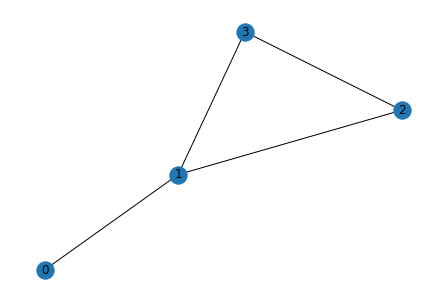

In [2]:
A = np.array([[0,2,0,0],[2,0,1,1],[0,1,0,1],[0,1,1,0]])
#A = np.array([[0,1,1],[1,0,1],[1,1,0]])
weight = np.ones_like(A)  # Uniform weight
G = nx.from_numpy_matrix(np.array(A))  
nx.draw(G, with_labels=True) 

## Input patrol route (A series of vertices represents the order of vertices in a period). The first node and the last node must be the same.

In [3]:
#route = [0,1,2,3,1,0]
route = [0,1,2,0]

In [4]:
M = len(route)
N = len(A)
two_route = route[0:M-1]+ route


Patrol route length


NameError: name 'route_len' is not defined

In [74]:
# A: adjacency matrix
# route: route of patrolling, starting point must equals to end point
# return average AOI
def AOI_average(A, route): 
    M = len(route)
    N = len(A)
    two_route = route[0:M-1]+ route
    route_len = 0
    for current_edge in range(M-1):
        route_len += A[route[current_edge]][route[current_edge+1]]
    AOI = 0
    # Traverse all edges in the graph
    for node_1 in range(N):
        for node_2 in range(node_1+1,N):  
            if A[node_1][node_2]>0:
                AOI_current_edge = 0

                # Find the edge in the patrol route
                for current_edge in range(M-1,2*M-2):
                    if (node_1 == two_route[current_edge] and node_2 == two_route[current_edge+1]) or \
                    (node_2 == two_route[current_edge] and node_1 == two_route[current_edge+1]):

                        # Find the last apperence of the edge in the patrol route
                        last_edge = current_edge - 1
                        temp_len = 0
                        while last_edge >= 0:
                            if (node_1 == two_route[last_edge] and node_2 == two_route[last_edge+1]) or \
                            (node_2 == two_route[last_edge] and node_1 == two_route[last_edge+1]):
                                break
                            temp_len += A[two_route[last_edge]][two_route[last_edge+1]]
                            last_edge = last_edge - 1
                        AOI_current_edge += 1/2 * temp_len * A[node_1][node_2] * (temp_len + A[node_1][node_2])
    #                    AOI_current_edge += 1/6 * A[node_1][node_2]**3
                        if two_route[last_edge] == two_route[current_edge]:
                            #clockwise
                            AOI_current_edge += 1/2 * A[node_1][node_2]**3 + 1/2 * A[node_1][node_2]**2 * temp_len
                        else:
                            AOI_current_edge += 2/3 * A[node_1][node_2]**3 + 1/2 * A[node_1][node_2]**2 * temp_len

                # If there is edge not in the route, return error
                if AOI_current_edge == 0:
                    print("Error: infinite AOI")
                AOI += AOI_current_edge * weight[node_1][node_2]
    AOI = AOI / route_len
#     print("AOI of the route")
#     print(AOI) 
#     print("length of the route")
#     print(route_len) 
    return(AOI,route_len)

## Some test cases

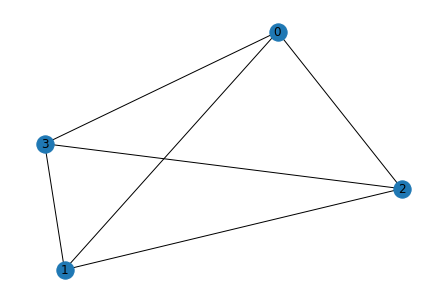

In [6]:
A = np.array([[0,1,2,3],[1,0,3,4],[2,3,0,5.1],[3,4,5.1,0]])
weight = np.ones_like(A)  # Uniform weight
G = nx.from_numpy_matrix(np.array(A))  
nx.draw(G, with_labels=True) 

In [7]:
route1 = [0,1,2,3,0,2,3,1,0]
route2 = [0,1,3,2,0,3,2,1,0]
route3 = [0,2,3,1,0,3,2,1,0]
route4 = [0,2,3,1,2,3,0,1,0]
route5 = [0,2,3,1,0,2,1,3,0]
route6 = [0,2,3,1,2,0,3,1,0]
route7 = [0,2,0,1,3,2,1,3,0]
AOI_average(A, route1)
AOI_average(A, route2)
AOI_average(A, route3)
AOI_average(A, route4)
AOI_average(A, route5)
AOI_average(A, route6)
AOI_average(A, route7)

AOI of the route
188.05307162534436
length of the route
24.2
AOI of the route
188.05307162534436
length of the route
24.2
AOI of the route
184.14289256198347
length of the route
24.2
AOI of the route
187.21009641873277
length of the route
24.2
AOI of the route
183.537918395574
length of the route
24.1
AOI of the route
182.4148201936376
length of the route
24.1
AOI of the route
190.44801521438447
length of the route
24.1


(190.44801521438447, 24.1)

In [8]:
A = np.array([[0,1,0,1],[1,0,1,1],[0,1,0,1],[1,1,1,0]])
route1 = [0,1,3,1,2,3,0]
route2 = [0,1,3,2,1,3,0]
AOI_average(A, route1)
AOI_average(A, route2)

AOI of the route
14.222222222222221
length of the route
6
AOI of the route
13.5
length of the route
6


(13.5, 6)

## Examples to determine the bounds (Graph A: star-shape graph)

AOI of the route
49.333333333333336
length of the route
12
AOI of the route
45.77777777777778
length of the route
12


(45.77777777777778, 12)

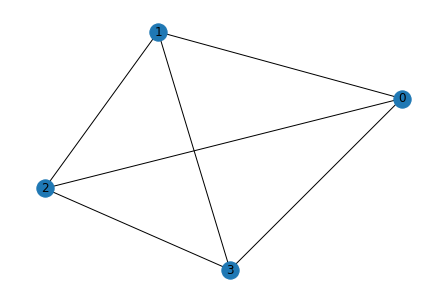

In [9]:
a = 2

A = np.array([[0,1,1,1],[1,0,a,a],[1,a,0,a],[1,a,a,0]])
weight = np.ones_like(A)  # Uniform weight
G = nx.from_numpy_matrix(np.array(A))  
nx.draw(G, with_labels=True) 
route1 = [0,1,2,3,1,0,2,0,3,0]
route2 = [0,1,2,0,1,3,0,2,3,0]
AOI_average(A, route1)
AOI_average(A, route2)

In [10]:
(49.333333333-45.7777777)/45.7777777

0.0776699047363323

AOI of the route
142.19877701579384
length of the route
20.049999999999997
AOI of the route
126.68275041562758
length of the route
20.049999999999997
AOI of the route
125.9068451336987
length of the route
20.07


(125.9068451336987, 20.07)

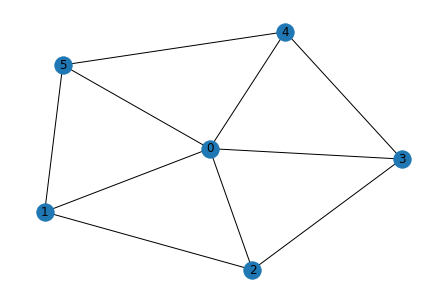

In [11]:
a = 2.01
b = 2.01

A = np.array([[0,1,1,1,1,1],[1,0,b,0,0,a],[1,b,0,a,0,0],[1,0,a,0,a,0],[1,0,0,a,0,b],[1,a,0,0,b,0]])
weight = np.ones_like(A)  # Uniform weight
G = nx.from_numpy_matrix(np.array(A))  
nx.draw(G, with_labels=True) 
route1 = [0,1,2,3,4,5,1,0,2,0,3,0,4,0,5,0]
route2 = [0,1,2,0,4,3,0,1,5,0,2,3,0,4,5,0]
route3 = [0,1,2,0,3,4,0,5,1,2,3,4,5,0]
AOI_average(A, route1)
AOI_average(A, route2)
AOI_average(A, route3)

In [12]:
(141.3333333333333-125.86666666666665)/125.86666666666665

0.1228813559322032

In [ ]:
A = np.array([[0,1,1],[1,0,1],[1,1,0]])
route1 = [0,1,2,0]
route2 = [0,1,0,2,1,0]
weight = np.ones_like(A)  # Uniform weight
AOI_average(A, route1)
AOI_average(A, route2)

## Find all CPP solution to graph A

In [68]:
# All edge connect to node 0 travse twice
A = np.array([[0,2,2,2,2,2],[2,0,1,0,0,1],[2,1,0,1,0,0],[2,0,1,0,1,0],[2,0,0,1,0,1],[2,1,0,0,1,0]])

# Initialize list
route_list = [[0]]
matrix_list = [A]
CPP_route = []

front = 0
back = 1

while (front < back):
    
    current_node = route_list[front][len(route_list[front])-1]
    current_route = route_list[front]
    current_matrix = matrix_list[front]
    
    
    # add CPP solution if length=16 and end_node=0
    if (len(route_list[front]) == 16) and (route_list[front][15] == 0):
        CPP_route.append(route_list[front])
        
    # find a next node
    for next_node in range(6):
        if (current_matrix[current_node, next_node] > 0):
            next_matrix = current_matrix.copy()
            next_matrix[current_node, next_node] -= 1
            next_matrix[next_node, current_node] -= 1
            next_route = current_route.copy()
            next_route.append(next_node)
            route_list += [next_route]
            matrix_list.append(next_matrix)
            back += 1
    front += 1
        

In [79]:
# Graph weight
a = 2.01
b = 2.01
A = np.array([[0,1,1,1,1,1],[1,0,b,0,0,a],[1,b,0,a,0,0],[1,0,a,0,a,0],[1,0,0,a,0,b],[1,a,0,0,b,0]])

# Find CPP route with minimum AOI
min_AOI = 100000 
for i in range(len(CPP_route)):
    AOI, route_len = AOI_average(A, CPP_route[i])
    if (AOI < min_AOI):
        min_AOI = AOI
        min_CPP_route = CPP_route[i]
        min_route_len = route_len

In [80]:
print('Minimum AOI in all CPP route:',min_AOI)
print('CPP route:', min_CPP_route, 'Route length', min_route_len)

# Counter example:
route3 = [0,1,2,0,3,4,0,5,1,2,3,4,5,0]
AOI, route_len = AOI_average(A, route3)
print('Counter example AOI:', AOI)
print('CPP route:', route3, 'Route length', route_len)

Minimum AOI in all CPP route: 126.14875207813799
CPP route: [0, 1, 2, 0, 3, 4, 0, 5, 1, 0, 2, 3, 0, 4, 5, 0] Route length 20.049999999999997
Counter example AOI: 125.9068451336987
CPP route: [0, 1, 2, 0, 3, 4, 0, 5, 1, 2, 3, 4, 5, 0] Route length 20.07
